# BST Insert and Remove Methods

We can remove/insert nodes in BST in $O(log(n))$ time, let's see how that goes

## Insertion

First we have to find the right position, then do the insert. Note that it's easier to insert nodes as leaf nodes rather than root/middle nodes, though this might result in an inbalanced tree.

```python
# Insert a new node and return the root of the BST.
def insert(root, val):
    if not root:
        # we have just gone past the correct leaf node, can insert appropriately here
        return TreeNode(val=val)
    
    if val > root.val:
        #we dont return anything here unlike BST Search, we simply do reassigning
        root.right = insert(root.right, val)
    elif val < root.val:
        root.left = insert(root.left, val)
    
    #return the current node regardless of anyth
    return root 
```

1. If the current node is null, we return a new node with the value val.
2. If the value is greater than the current node, we recursively call the function with the right child of the current node.
3. If the value is less than the current node, we recursively call the function with the left child of the current node.
4. We return the current node after the recursive call.

Note that step 1 is the base case, steps 2 & 3 are recursive expansions, and step 4 is the recursive collapse

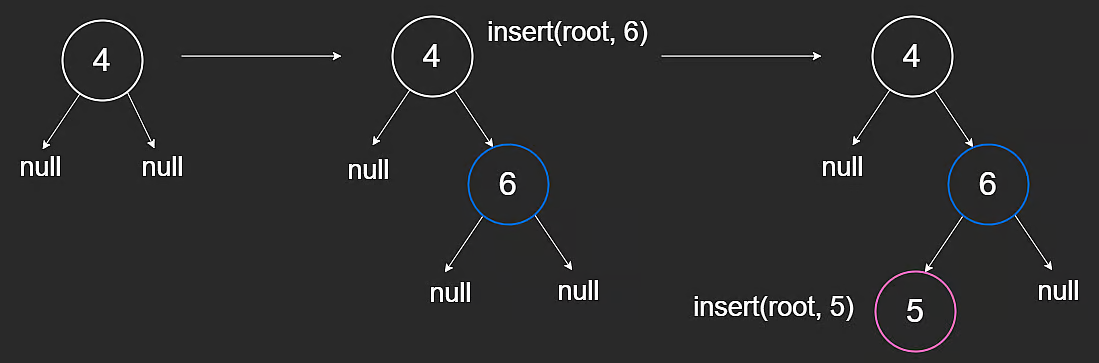

If tree is balanced, time complexity of this operation is $O(log(n))$. Number of nodes we visit is proportional to height of tree, and for balanced trees the height is $log(n)$

---

## Removal

Removal is much more complicated, where we need to consider 2 cases.

### Case 1 - the target node has 0 or 1 children

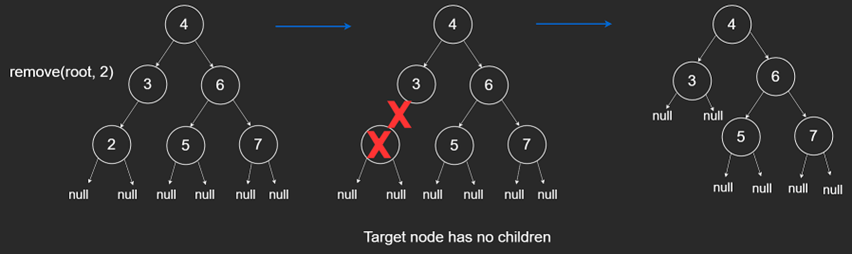

If we wish to delete node `2`, which has no children, the left_child pointer of `3` (the parent) now points to `null`.

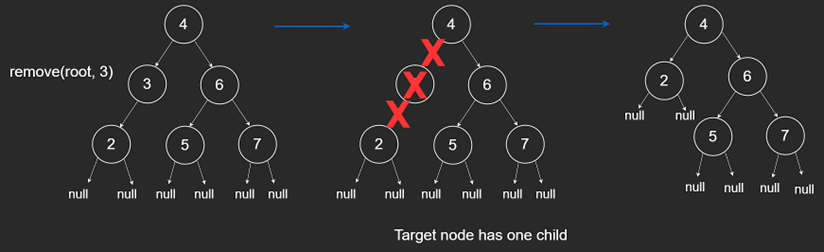

If we wish to delete node `3`, which has one child, the `left_child` of its parent node will node point to its child node.

### Case 2 - the target node has 2 children

If we wanted to delete a node with two children, say, `6`, we replace the node with its **in-order successor**. The successor will be a *leaf node* to make things simple, and is 

either 
- *the smallest node (left-most) in the right subtree of the target node*
  - this will ensure for the replacement, everything in the right subtree is bigger than this successor as you've chosen the minimum in the right subtree
  - everything in left subtree still smaller than this successor by definition of BST

or the 
- *biggest node (right-most) in the left subtree of the target node*.
  - for the replacement, everything in the left subtree is smaller than this successor as you've chosen the max in this left subtree
  - by definition, everything in the right subtree is bigger than the successor

hence preserving the sorted order of BSTs. In this tutorial, we will be using the first method.

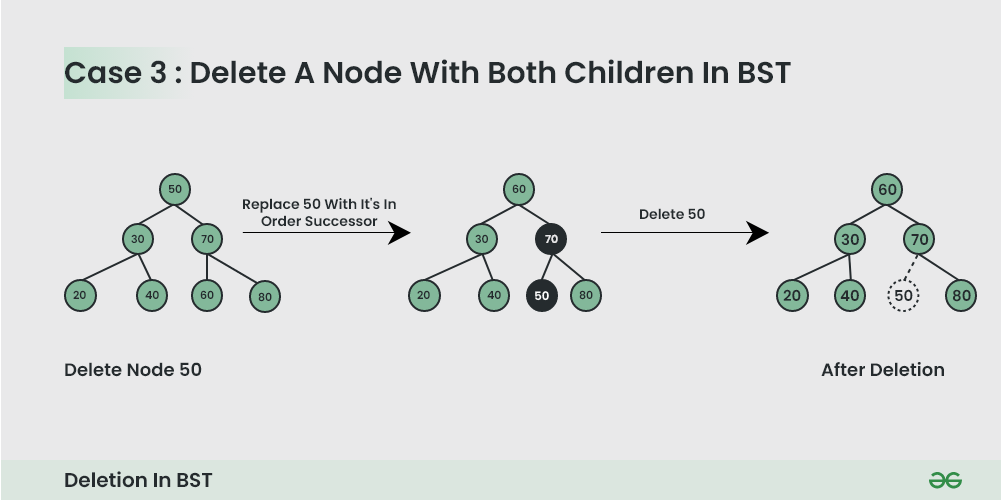

In [ ]:
# Return the minimum value node of the BST.
def minValueNode(root):
    #simply keep going left until you hit right before leaf node, then execute this loop to hit the leaf node
    while root.left:
        root=root.left
    return root

# Remove a node and return the root of the BST.
def remove(root, val):
    # base case, hit none and will be assigned to the parent node if the parent is a leaf node
    if not root:
        return None
    
    #searching for the target node (thats equal to val) to remove
    #at this step, you dont return yet just do the recursive call
    if val > root.val:
        root.right = remove(root.right, val)
    elif val < root.val:
        root.left = remove(root.left, val)

    #found the target
    else:
        #this handles the case of 0 children or only right child
        #if zero children, then return None
        if not root.left:
            #this right child node will be returned and assigned to target's parent node
            return root.right
        
        #handles case of only left child
        elif not root.right:
            #this left child node will be returned and assigned to target's parent node
            return root.left
        
        #find the in-order successor
        else:
            #find the minimum (left-most) node of the right subtree
            minNode = minValueNode(root.right)
            #replace targetNode.val with this minNode.val
            root.val = minNode.val
            #find the minValueNode again and remove it
            root.right = remove(root.right, minNode.val)

    #regardless of anything, return this current node
    return root

---

### Time Complexity

Number of steps taken is proportional to height of tree. The height is $O(log(n))$ for balanced trees, or for unbalanced trees it is $O(n)$ in the worst case.

### Space Complexity

Again, this is $O(log(n))$ in best case and $O(n)$ in the worst case. This is since we use recursion to traverse the tree, with a new recursive call at every step and using new memory.